# Compression

In [1]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np

In [2]:
#image must be in same folder

Enter the name of imageluffy
Enter the extension of file namepng


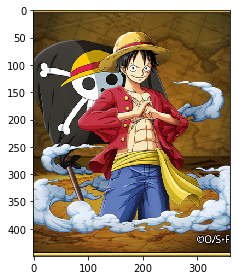

In [7]:
# try using luffy as name & png as format
name=input('Enter the name of image')
ext=input('Enter the extension of file name')
image = io.imread(name+'.'+ext)
io.imshow(image)
io.show()

In [8]:
rows = image.shape[0]
cols = image.shape[1]
 
image = image.reshape(image.shape[0]*image.shape[1],4)
kmeans = KMeans(n_clusters = 64, n_init=10, max_iter=200)
kmeans.fit(image)

clusters = np.asarray(kmeans.cluster_centers_,dtype=np.uint8) 
labels = np.asarray(kmeans.labels_,dtype=np.uint8 )  
labels = labels.reshape(rows,cols); 

np.save('codebook'+name+'.npy',clusters)    
io.imsave('compressed'+'_'+name+'.'+ext,labels);

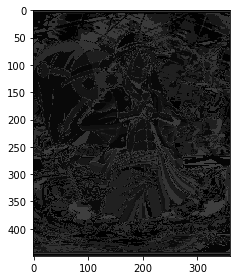

In [9]:
io.imshow('compressed_'+name+'.'+ext)
io.show()

# Extraction/Decompression

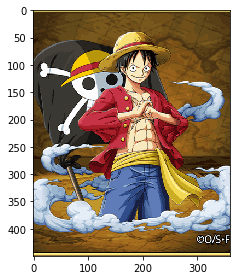

In [10]:
centers = np.load('codebook'+name+'.npy')

c_image = io.imread('compressed_'+name+'.'+ext)

image = np.zeros((c_image.shape[0],c_image.shape[1],4),dtype=np.uint8 )
for i in range(c_image.shape[0]):
    for j in range(c_image.shape[1]):
            image[i,j,:] = centers[c_image[i,j],:]
    
io.imsave('reconstructed_'+name+'.'+ext,image);
io.imshow(image)
io.show()